In [26]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
import numpy as np
import seaborn as sns


In [27]:
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False


In [2]:
df = pd.read_csv("./locker data.csv")

# Raw Layer

In [3]:
df["AddDt"] = pd.to_datetime(df["AddDt"])

In [4]:
df = df[df["AddDt"] > "2021-07-26"]

In [5]:
df = df.iloc[:, [1, 3, 4, 5, 6]]

<AxesSubplot:>

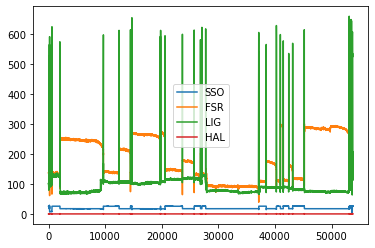

In [6]:
df.iloc[:, 1:].plot()

# Feature Layer

In [7]:
feature_df = df.copy()

## 조도센서
- 중간값인 300을 threshold로 잡아 디지털 신호로 변환

<AxesSubplot:>

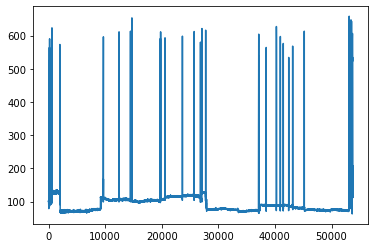

In [8]:
feature_df["LIG"].plot()

In [9]:
feature_df.loc[feature_df["LIG"] < 300, "LIG"] = 0
feature_df.loc[feature_df["LIG"] >= 300, "LIG"] = 1

<AxesSubplot:>

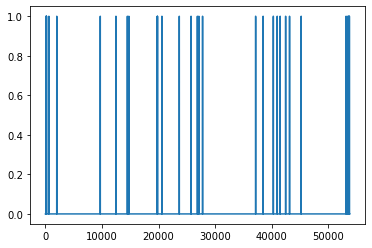

In [10]:
feature_df["LIG"].plot()

## 초음파센서
- 25와 17.5 사이의 값인 21.25를 기준으로 함

<AxesSubplot:>

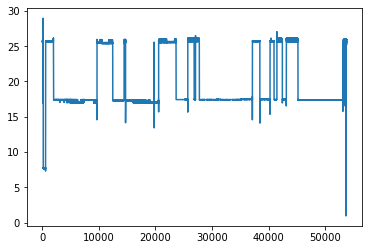

In [11]:
feature_df["SSO"].plot()

In [12]:
feature_df.loc[feature_df["SSO"] < 21.25, "SSO"] = 0
feature_df.loc[feature_df["SSO"] >= 21.25, "SSO"] = 1

<AxesSubplot:>

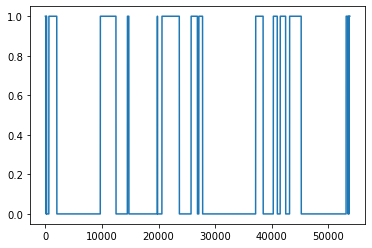

In [13]:
feature_df["SSO"].plot()

## 압력센서
- 값의 변동폭이 너무 커서 threshold값을 책정할 수 없다.
- 일단 테스트단계로 170

<AxesSubplot:>

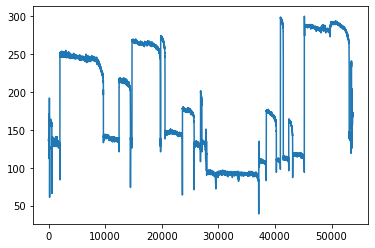

In [14]:
feature_df["FSR"].plot()

In [15]:
feature_df.loc[feature_df["FSR"] < 160, "FSR"] = 0
feature_df.loc[feature_df["FSR"] >= 160, "FSR"] = 1


<AxesSubplot:>

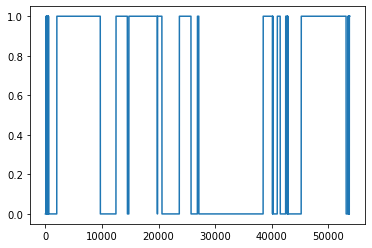

In [16]:
feature_df["FSR"].plot()

## 홀 센서 (자기 센서)
- 기존의 디지털 신호 그대로 차용

<AxesSubplot:>

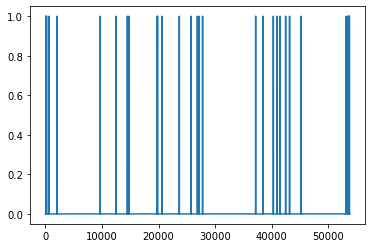

In [17]:
feature_df["HAL"].plot()

## 디지털신호 확인

In [28]:
def show(start=0, end=-1):
    fig = plt.figure(figsize=(10, 12))
    gs = fig.add_gridspec(4, hspace=0)
    axs = gs.subplots(sharex=True, sharey=True)
    fig.suptitle("각 센서 데이터 그래프")

    for ax, i in zip(axs, range(1, 5)):
        ax.plot(feature_df.iloc[start:end, i])
    # plt.title("SSO")
    # plt.title("FSR")
    # plt.title("LIGHT")
    # plt.title("HAL")

    for ax in axs:
        ax.label_outer()


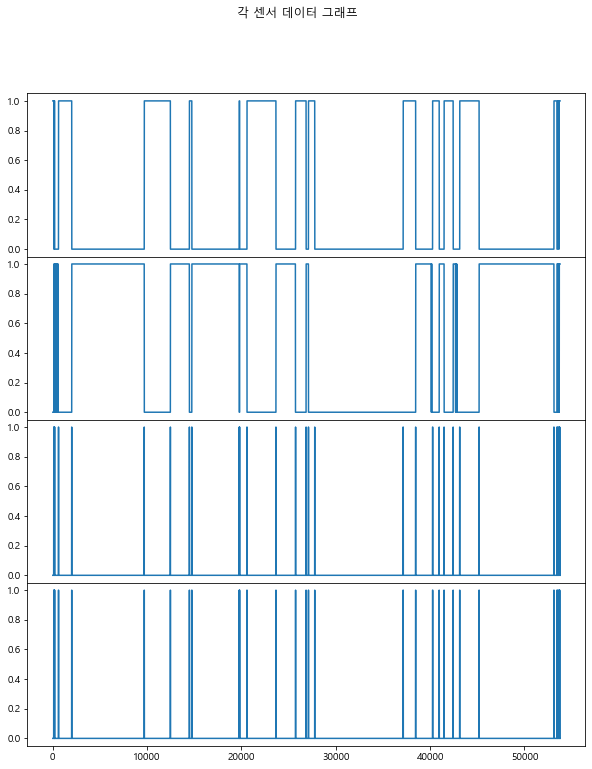

In [29]:
show()

## 조도센서와 자기센서 혼합

- 조도센서와 자기센서는 값이 매우 유사하다.

<AxesSubplot:>

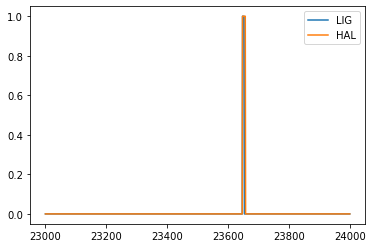

In [20]:
feature_df.iloc[23000:24000, [3, 4]].plot()


## 압력센서와 초음파센서의 혼합 그래프

압력센서와 초음파센서의 값은 항상 반비례관계여야 한다.
  > 압력센서가 1이고 초음파센서가 0이어야 물건이 들어왔다는 뜻이기 때문

인덱스가 `30000`근처에는 데이터가 겹쳐있는 걸로 보아 압력센서간 문제가 발생한 것으로 보인다.

<AxesSubplot:>

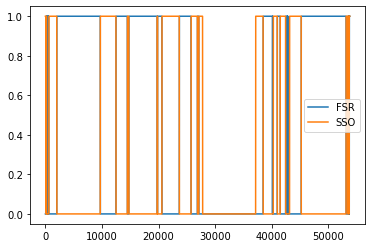

In [21]:
feature_df.loc[:, ["FSR", "SSO"]].plot()

## 조도센서와 초음파센서 혼합 그래프

<AxesSubplot:>

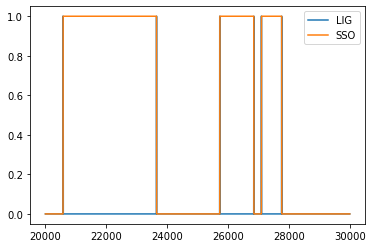

In [22]:
feature_df.loc[20000:30000, ["LIG", "SSO"]].plot()


In [23]:
test_df = pd.read_csv("./senval_new4.csv")


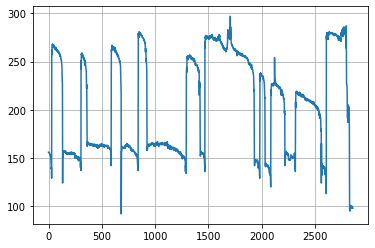

In [24]:
test_df["FSR"].plot()
plt.grid()

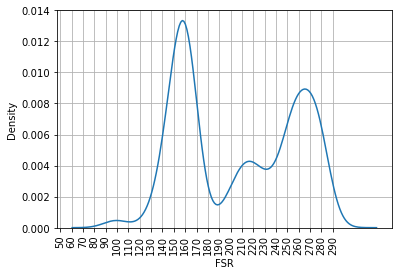

In [25]:
sns.kdeplot(test_df['FSR'])
plt.grid()
tik = np.arange(50, 300, 10)
_ = plt.xticks(ticks=tik, labels=tik, rotation=90)
